# Loading data
    this dataset has two folders, which are train and test folder. 
        train folder: 240 images
        test folder: 60 images
        four categories: apple; banana; orange; mixed.

In [175]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import cv2
import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator

In [176]:
# To get training data
training_data = []
IMG_SIZE = 64        # after discussion, my team will ues 64 size only


def create_training_data():
    img_path = "Dataset/"
    train_images = img_path + "train/*.jpg"
    train_files = glob.glob(train_images)
    for img in train_files:
        img_array = cv2.imread(img)
        new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
        className = os.path.basename(img)
        if className.startswith("a"):
            classes = 0
        elif className.startswith("b"):
            classes = 1
        elif className.startswith("m"):
            classes = 2
        else:
            classes = 3
        class_name = classes
        training_data.append([new_array, class_name])
            
create_training_data() 

In [177]:
# To get test data
testing_data = []
IMG_SIZE = 64


def create_testing_data():
    img_path = "Dataset/"
    test_images = img_path + "test/*.jpg"
    test_files = glob.glob(test_images)
    for img in test_files:
        img_array = cv2.imread(img)
        new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
        className = os.path.basename(img)
        if className.startswith("a"):
            classes = 0
        elif className.startswith("b"):
            classes = 1
        elif className.startswith("m"):
            classes = 2
        else:
            classes = 3
        class_name = classes
        testing_data.append([new_array, class_name])
            
create_testing_data()

In [178]:
print(len(training_data)) # make surer that get all test data from folde
print(len(testing_data))

240
60


In [201]:
X_train = []
Y_train = []

for features, label in training_data:
    X_train.append(features)
    Y_train.append(label)
    
X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [202]:
X_test = []
Y_test = []

for features, label in testing_data:
    X_test.append(features)
    Y_test.append(label)
    
X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [203]:
print(X_train.shape)
print(X_test.shape)

(240, 64, 64, 3)
(60, 64, 64, 3)


In [204]:
# sumarize pixel values
print(X_train.min(), X_train.max(), X_train.mean(), X_train.std())
print(X_test.min(), X_test.max(), X_test.mean(), X_test.std())

0 255 173.64649047851563 91.0707972706838
0 255 178.32510443793402 90.53204129751315


# Implementation 1
    In this implementation 

#### normalized the values by 255

In [35]:
X_train_norm = X_train / 255
X_test_norm = X_test / 255

In [36]:
X_train_norm

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]

#### Label the values by one-hot encode the values

In [37]:
labels = np.unique(Y_test)
labels

array([0, 1, 2, 3])

In [38]:
num_labels = len(labels)
num_labels

4

In [39]:
Y_train_1hot = tf.keras.utils.to_categorical(Y_train, num_labels)   # the labels must be numerical.
Y_test_1hot = tf.keras.utils.to_categorical(Y_test, num_labels)

In [40]:
Y_train_1hot

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],


#### Train Model

In [41]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=32,   
    kernel_size=(3, 3),
    activation='relu',
    input_shape=(64, 64, 3)))
model.add(tf.keras.layers.Conv2D(filters=32,
    kernel_size=(5, 5),
    activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))  
model.add(tf.keras.layers.Dropout(rate=0.25))  
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))  
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(units=4, activation='softmax'))

In [42]:
model.compile(loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy'])

In [43]:
hist = model.fit(x=X_train, y=Y_train_1hot, batch_size=16, epochs=10)

Epoch 1/10
15/15 [==============================] - 4s 209ms/step - loss: 56.7978 - accuracy: 0.4333
Epoch 2/10
15/15 [==============================] - 3s 206ms/step - loss: 1.2837 - accuracy: 0.5875
Epoch 3/10
15/15 [==============================] - 3s 204ms/step - loss: 1.0714 - accuracy: 0.6250
Epoch 4/10
15/15 [==============================] - 3s 206ms/step - loss: 1.1021 - accuracy: 0.6375
Epoch 5/10
15/15 [==============================] - 3s 208ms/step - loss: 0.8848 - accuracy: 0.6792
Epoch 6/10
15/15 [==============================] - 3s 211ms/step - loss: 0.7863 - accuracy: 0.7167
Epoch 7/10
15/15 [==============================] - 3s 206ms/step - loss: 0.7242 - accuracy: 0.7667
Epoch 8/10
15/15 [==============================] - 3s 209ms/step - loss: 0.5960 - accuracy: 0.7917
Epoch 9/10
15/15 [==============================] - 3s 211ms/step - loss: 0.5048 - accuracy: 0.8208
Epoch 10/10
15/15 [==============================] - 3s 211ms/step - loss: 0.5707 - accuracy: 0.833

#### Test the CNN model and perform evaluation

In [44]:
loss, accuracy = model.evaluate(x=X_test, y=Y_test_1hot)

print('loss =', loss)
print('accuracy =', accuracy)

2/2 [==============================] - 0s 81ms/step - loss: 2.0388 - accuracy: 0.6333
loss = 2.0388495922088623
accuracy = 0.6333333253860474


#### Plot the loss  and accuracy

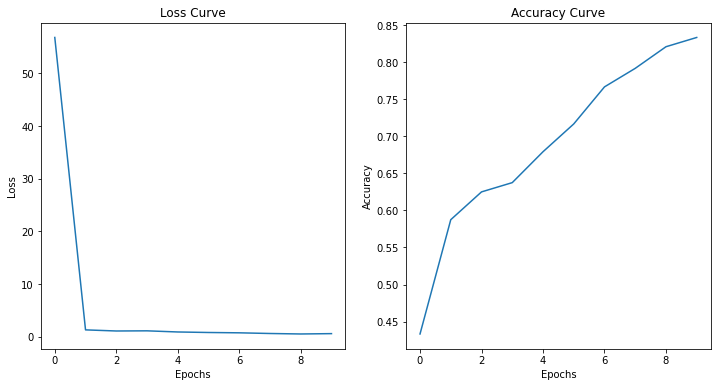

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax[0].plot(hist.history['loss'])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss Curve')

ax[1].plot(hist.history['accuracy'])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Accuracy Curve')

plt.show()

#### Summary
    In this implementation, the mdoel accuracy in train is 0.8333, but the accuracy in test is 0.6333, so the mdoel overfitting.
    Action to refine the model:
        (1) add more training data using image augmentation;
        (2) try to use deeper model by adding more layers.

# Implementation 2
    Using images augmentation
    Using deeper model

In [140]:
print(X_train.shape)
print(X_test.shape)

(240, 64, 64, 3)
(60, 64, 64, 3)


#### images processing and augmentation

In [141]:
datagen = ImageDataGenerator(
    rotation_range=40,
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')

datagen.fit(X_train)

#### Label the values by one-hot encode the values

In [142]:
labels = np.unique(Y_test)
num_labels = len(labels)
Y_train_1hot = tf.keras.utils.to_categorical(Y_train, num_labels)   # the labels must be numerical.
Y_test_1hot = tf.keras.utils.to_categorical(Y_test, num_labels)
Y_train_1hot

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],


### Train Model

#### Model 1

In [147]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=16,       # change the filters from 32 to 16
    kernel_size=(3, 3),
    activation='relu',
    input_shape=(64, 64, 3)))
model.add(tf.keras.layers.Conv2D(filters=16,        # change the filters from 32 to 16
    kernel_size=(5, 5),
    activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))  
model.add(tf.keras.layers.Dropout(rate=0.25))  
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))  
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(units=4, activation='softmax'))

In [148]:
model.compile(loss='categorical_crossentropy',
    optimizer='adam',                          
    metrics=['accuracy'])   

In [149]:
hist = model.fit(datagen.flow(X_train, Y_train_1hot, batch_size=8), 
                 batch_size=16, 
                 epochs=20)

Epoch 1/20
30/30 [==============================] - 3s 74ms/step - loss: 1.4099 - accuracy: 0.3667
Epoch 2/20
30/30 [==============================] - 2s 73ms/step - loss: 1.2304 - accuracy: 0.4958
Epoch 3/20
30/30 [==============================] - 2s 73ms/step - loss: 1.0061 - accuracy: 0.6167
Epoch 4/20
30/30 [==============================] - 3s 82ms/step - loss: 0.7893 - accuracy: 0.7042
Epoch 5/20
30/30 [==============================] - 3s 83ms/step - loss: 0.7119 - accuracy: 0.7583
Epoch 6/20
30/30 [==============================] - 2s 81ms/step - loss: 0.6801 - accuracy: 0.7708
Epoch 7/20
30/30 [==============================] - 2s 75ms/step - loss: 0.6822 - accuracy: 0.8000
Epoch 8/20
30/30 [==============================] - 2s 79ms/step - loss: 0.6752 - accuracy: 0.8125
Epoch 9/20
30/30 [==============================] - 2s 79ms/step - loss: 0.6084 - accuracy: 0.7750
Epoch 10/20
30/30 [==============================] - 2s 78ms/step - loss: 0.5860 - accuracy: 0.8083
Epoch 11/

##### Test the CNN model and perform evaluation

In [150]:
loss, accuracy = model.evaluate(x=X_test, y=Y_test_1hot)

print('loss =', loss)
print('accuracy =', accuracy)

2/2 [==============================] - 0s 43ms/step - loss: 179.2069 - accuracy: 0.7833
loss = 179.20687866210938
accuracy = 0.7833333611488342


##### Plot the loss  and accuracy

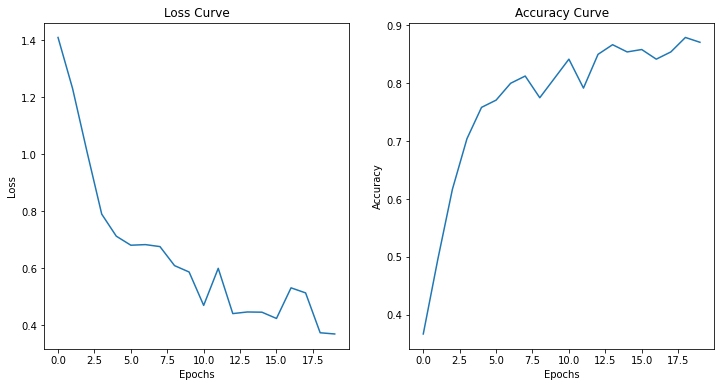

In [151]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax[0].plot(hist.history['loss'])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss Curve')

ax[1].plot(hist.history['accuracy'])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Accuracy Curve')

plt.show()

### Model 2  

In [156]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(16, (3, 3), 
                                 input_shape=(64, 64, 3)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(16, (3, 3)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(32, (5, 5)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(4))
model.add(tf.keras.layers.Dense(units=4, activation='softmax'))

In [157]:
model.compile(loss='categorical_crossentropy',
    optimizer='adam',                          
    metrics=['accuracy'])      

In [158]:
hist = model.fit(datagen.flow(X_train, Y_train_1hot, batch_size=8), 
                 batch_size=16, 
                 epochs=25)

Epoch 1/25
30/30 [==============================] - 1s 28ms/step - loss: 1.2597 - accuracy: 0.4333
Epoch 2/25
30/30 [==============================] - 1s 29ms/step - loss: 0.8941 - accuracy: 0.6500
Epoch 3/25
30/30 [==============================] - 1s 33ms/step - loss: 0.7141 - accuracy: 0.7333
Epoch 4/25
30/30 [==============================] - 1s 28ms/step - loss: 0.6243 - accuracy: 0.7750
Epoch 5/25
30/30 [==============================] - 1s 31ms/step - loss: 0.6342 - accuracy: 0.8125
Epoch 6/25
30/30 [==============================] - 1s 28ms/step - loss: 0.6730 - accuracy: 0.8208
Epoch 7/25
30/30 [==============================] - 1s 28ms/step - loss: 0.4990 - accuracy: 0.8542
Epoch 8/25
30/30 [==============================] - 1s 28ms/step - loss: 0.5231 - accuracy: 0.8250
Epoch 9/25
30/30 [==============================] - 1s 28ms/step - loss: 0.4921 - accuracy: 0.8625 0s - loss: 0.4430 - accura
Epoch 10/25
30/30 [==============================] - 1s 30ms/step - loss: 0.4911 -

##### Test the CNN model and perform evaluation

In [159]:
loss, accuracy = model.evaluate(x=X_test, y=Y_test_1hot)

print('loss =', loss)
print('accuracy =', accuracy)

2/2 [==============================] - 0s 22ms/step - loss: 136.4954 - accuracy: 0.8667
loss = 136.4954071044922
accuracy = 0.8666666746139526


##### Plot the loss  and accuracy

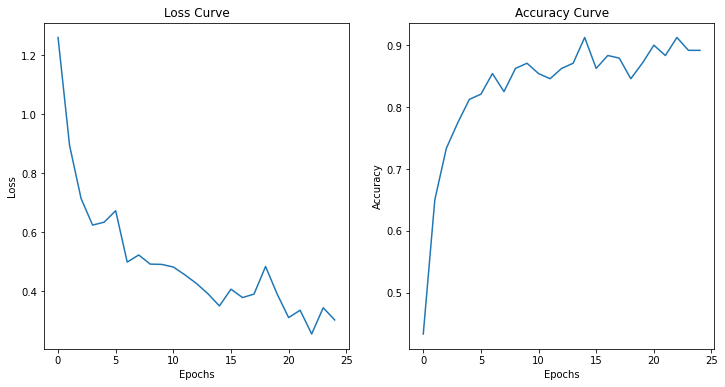

In [160]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax[0].plot(hist.history['loss'])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss Curve')

ax[1].plot(hist.history['accuracy'])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Accuracy Curve')

plt.show()

#### Summary
    In this implementation, the mdoel accuracy in train is 0.9167, but the accuracy in test is 0.85, so the mdoel is  still overfitting.
    Action to refine the model:
        (1) add more training data using image augmentation;
        (2) try to use deeper model by adding more layers to improve the accuracy of the model.

# Implementation 3
    Adding more images augmentation

In [165]:
print(X_train.shape)
print(X_test.shape)

(240, 64, 64, 3)
(60, 64, 64, 3)


#### images augmentation

In [183]:
datagen = ImageDataGenerator(
    rotation_range=40,
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')

datagen.fit(X_train)

#### Label the values by one-hot encode the values

In [184]:
labels = np.unique(Y_test)
num_labels = len(labels)
Y_train_1hot = tf.keras.utils.to_categorical(Y_train, num_labels)   # the labels must be numerical.
Y_test_1hot = tf.keras.utils.to_categorical(Y_test, num_labels)
Y_train_1hot

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],


### Trian Model

In [249]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.experimental.preprocessing.RandomContrast(0.9))

model.add(tf.keras.layers.Conv2D(16, (3, 3), 
                                 input_shape=(64, 64, 3)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(16, (3, 3)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(64, (5, 5)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Flatten()) 
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(4))
model.add(tf.keras.layers.Dense(units=4, activation='softmax'))

In [250]:
model.compile(loss='categorical_crossentropy',
    optimizer='adam',                          
    metrics=['accuracy'])   

In [251]:
hist = model.fit(datagen.flow(X_train, Y_train_1hot, batch_size=16), 
                 batch_size=16, 
                 epochs=40)

Epoch 1/40
15/15 [==============================] - 2s 60ms/step - loss: 1.3549 - accuracy: 0.3208
Epoch 2/40
15/15 [==============================] - 1s 56ms/step - loss: 1.3120 - accuracy: 0.4083 0s - loss: 1.2692 - accura
Epoch 3/40
15/15 [==============================] - 1s 57ms/step - loss: 1.2147 - accuracy: 0.5125
Epoch 4/40
15/15 [==============================] - 1s 58ms/step - loss: 1.0399 - accuracy: 0.5750
Epoch 5/40
15/15 [==============================] - 1s 57ms/step - loss: 0.8528 - accuracy: 0.7292
Epoch 6/40
15/15 [==============================] - 1s 56ms/step - loss: 0.8205 - accuracy: 0.7083
Epoch 7/40
15/15 [==============================] - 1s 55ms/step - loss: 0.8693 - accuracy: 0.6750
Epoch 8/40
15/15 [==============================] - 1s 57ms/step - loss: 0.7357 - accuracy: 0.7750
Epoch 9/40
15/15 [==============================] - 1s 55ms/step - loss: 0.6402 - accuracy: 0.7625
Epoch 10/40
15/15 [==============================] - 1s 57ms/step - loss: 0.6995 -

In [252]:
loss, accuracy = model.evaluate(x=X_test, y=Y_test_1hot)

print('loss =', loss)
print('accuracy =', accuracy)

2/2 [==============================] - 0s 23ms/step - loss: 58.3985 - accuracy: 0.9167
loss = 58.39850616455078
accuracy = 0.9166666865348816


##### Plot the loss  and accuracy

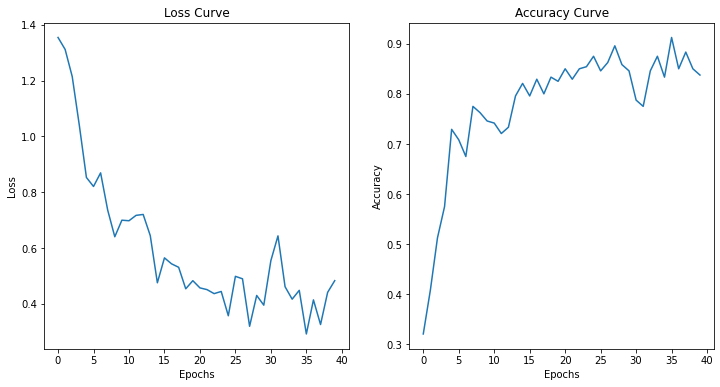

In [253]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax[0].plot(hist.history['loss'])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss Curve')

ax[1].plot(hist.history['accuracy'])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Accuracy Curve')

plt.show()